## PREDICTING WHETHER A CUSTOMER WOULD BE A POTENTIAL BUYER TO RUN A MARETING CAMPAIGN.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_excel("Buying probabilities with Target.xlsx")

##### This data contains the target variable and thus logisitic regression is used to fit in the model and compare the results with the target. 


### Preparing the data for modelling

In [3]:
df.shape

(22223, 11)

In [4]:
df.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,8415498,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,12107603,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,14400995,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,28724674,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemClusterGroup  21549 non-null  object 
 4   DemGender        19711 non-null  object 
 5   DemReg           21758 non-null  object 
 6   DemTVReg         21758 non-null  object 
 7   LoyalClass       22223 non-null  object 
 8   LoyalSpend       22223 non-null  float64
 9   LoyalTime        21942 non-null  float64
 10  TargetBuy        22223 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.9+ MB


In [6]:
df.describe()

,ID,DemAffl,DemAge,LoyalSpend,LoyalTime,TargetBuy
count,2.222300e+04,21138.000000,20715.000000,22223.000000,21942.000000,22223.000000
mean,2.605540e+07,8.711893,53.797152,4420.590041,6.564670,0.247716
std,1.507497e+07,3.421125,13.206048,7559.047522,4.657113,0.431696
min,1.400000e+02,0.000000,18.000000,0.010000,0.000000,0.000000
25%,1.169402e+07,6.000000,44.000000,0.010000,4.000000,0.000000
50%,2.874879e+07,8.000000,54.000000,2000.000000,5.000000,0.000000
75%,3.745402e+07,11.000000,64.000000,6000.000000,8.000000,0.000000
max,5.285647e+07,34.000000,79.000000,296313.850000,39.000000,1.000000


In [7]:
# Dropping the ID column as it serves no use to the model.
df.drop("ID", axis=1, inplace=True)

In [8]:
numeric = df.select_dtypes(exclude=['object'])

In [9]:
cols = list(numeric.columns)

<Axes: >

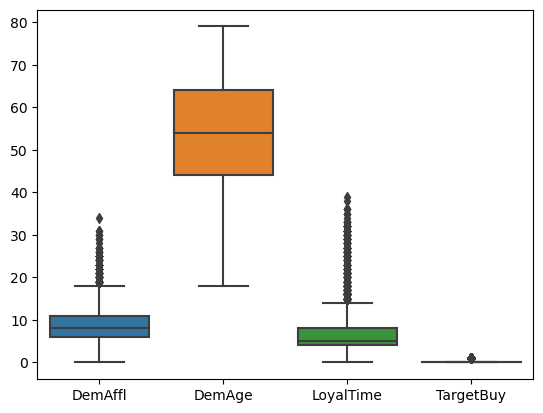

In [10]:
sns.boxplot(data=df[["DemAffl","DemAge","LoyalTime","TargetBuy"]])

In [11]:
df.isnull().sum()

DemAffl            1085
DemAge             1508
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
LoyalClass            0
LoyalSpend            0
LoyalTime           281
TargetBuy             0
dtype: int64

* It could be observed that many variables have null values which are imputed with the mean or mode based on the business
scenario

In [12]:
# Missing values imputation

df['DemAffl']=df['DemAffl'].fillna(df['DemAffl'].mode()[0])
df['DemAge']=df['DemAge'].fillna(df['DemAge'].mode()[0])
df['DemClusterGroup']=df['DemClusterGroup'].fillna(df['DemClusterGroup'].mode()[0])
df['DemGender']=df['DemGender'].fillna(df['DemGender'].mode()[0])
df['DemReg']=df['DemReg'].fillna(df['DemReg'].mode()[0])
df['DemTVReg']=df['DemTVReg'].fillna(df['DemTVReg'].mode()[0])
df['LoyalTime']=df['LoyalTime'].fillna(df['LoyalTime'].mean())

In [13]:
df.isna().sum()

DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
LoyalClass         0
LoyalSpend         0
LoyalTime          0
TargetBuy          0
dtype: int64

In [14]:
df.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,C,F,South East,London,Tin,0.01,5.00000,0
1,15.0,51.0,C,M,South East,London,Gold,8000.00,5.00000,1
2,8.0,51.0,C,M,Midlands,East,Tin,0.01,6.56467,1
3,8.0,28.0,C,F,South East,London,Tin,0.01,6.56467,1
4,14.0,67.0,C,F,South East,London,Tin,0.01,7.00000,0


In [15]:
objects = df.select_dtypes(include = ['object'])

In [16]:
df["DemGender"].value_counts()

DemGender
F    14661
M     5815
U     1747
Name: count, dtype: int64

In [17]:
df["DemClusterGroup"].value_counts()

DemClusterGroup
C    5240
D    4378
B    4144
F    3949
E    2608
A    1850
U      54
Name: count, dtype: int64

### Using Label encoder to convert all values to numeric. 

In [18]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()



In [19]:
objects.head()

,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass
0,C,F,South East,London,Tin
1,C,M,South East,London,Gold
2,C,M,Midlands,East,Tin
3,C,F,South East,London,Tin
4,C,F,South East,London,Tin


In [20]:
for i in objects:
    df[i] = lbe.fit_transform(df[i].astype('str'))
    integer_mapping = {j: i for i, j in enumerate(lbe.classes_)}
    print(integer_mapping)


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'U': 6}
{'F': 0, 'M': 1, 'U': 2}
{'Midlands': 0, 'North': 1, 'Scottish': 2, 'South East': 3, 'South West': 4}
{'Border': 0, 'C Scotland': 1, 'East': 2, 'London': 3, 'Midlands': 4, 'N East': 5, 'N Scot': 6, 'N West': 7, 'S & S East': 8, 'S West': 9, 'Ulster': 10, 'Wales & West': 11, 'Yorkshire': 12}
{'Gold': 0, 'Platinum': 1, 'Silver': 2, 'Tin': 3}


In [21]:
df.head(10)

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,2,0,3,3,3,0.01,5.00000,0
1,15.0,51.0,2,1,3,3,0,8000.00,5.00000,1
2,8.0,51.0,2,1,0,2,3,0.01,6.56467,1
3,8.0,28.0,2,0,3,3,3,0.01,6.56467,1
4,14.0,67.0,2,0,3,3,3,0.01,7.00000,0
5,8.0,65.0,2,0,3,3,2,3000.00,3.00000,0
6,7.0,41.0,2,0,3,3,3,0.01,7.00000,0
7,13.0,50.0,2,0,3,3,3,0.01,5.00000,1
8,8.0,36.0,2,0,3,3,3,0.01,9.00000,0
9,8.0,51.0,2,1,0,10,2,2000.00,1.00000,0


### Checking for Multicollinearity

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(Z):
    vif = pd.DataFrame()
    vif["variables"] = Z.columns
    vif["VIF"] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]

    return(vif)

In [23]:
Z = df.iloc[:,0:9]
calc_vif(Z)

,variables,VIF
0,DemAffl,6.278630
1,DemAge,10.734656
2,DemClusterGroup,3.659632
3,DemGender,1.435472
4,DemReg,2.474645
5,DemTVReg,3.752279
6,LoyalClass,3.851766
7,LoyalSpend,1.863196
8,LoyalTime,3.153032


### Splitting the data to fit into the model.

In [24]:
X = df.drop("TargetBuy", axis=1)
y = df["TargetBuy"]

In [25]:
# splitting dataset into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17778 entries, 2162 to 2732
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemAffl          17778 non-null  float64
 1   DemAge           17778 non-null  float64
 2   DemClusterGroup  17778 non-null  int32  
 3   DemGender        17778 non-null  int32  
 4   DemReg           17778 non-null  int32  
 5   DemTVReg         17778 non-null  int32  
 6   LoyalClass       17778 non-null  int32  
 7   LoyalSpend       17778 non-null  float64
 8   LoyalTime        17778 non-null  float64
dtypes: float64(4), int32(5)
memory usage: 1.0 MB


In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4445 entries, 17281 to 4926
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemAffl          4445 non-null   float64
 1   DemAge           4445 non-null   float64
 2   DemClusterGroup  4445 non-null   int32  
 3   DemGender        4445 non-null   int32  
 4   DemReg           4445 non-null   int32  
 5   DemTVReg         4445 non-null   int32  
 6   LoyalClass       4445 non-null   int32  
 7   LoyalSpend       4445 non-null   float64
 8   LoyalTime        4445 non-null   float64
dtypes: float64(4), int32(5)
memory usage: 260.4 KB


### Logistic Regression Model building. 

In [28]:
logreg=  LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [29]:
print(confusion_matrix(y_test,y_pred))

[[3191  176]
 [ 688  390]]


In [30]:
print(accuracy_score(y_test, y_pred))

0.8056242969628796


In [31]:
predictions = logreg.predict_proba(X_test)
predictions

array([[0.86222238, 0.13777762],
       [0.64391333, 0.35608667],
       [0.48533626, 0.51466374],
       ...,
       [0.88585384, 0.11414616],
       [0.90559532, 0.09440468],
       [0.8739431 , 0.1260569 ]])

In [32]:
y_test.value_counts()

TargetBuy
0    3367
1    1078
Name: count, dtype: int64

In [33]:
len(predictions)

4445

In [34]:
# writing model output file

df_prediction = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_test= pd.DataFrame(y_test)
df_test = df_test.rename({"TargetBuy": "Actual Outcome"}, axis=1)
df_x_test = pd.DataFrame(X_test)

df_prediction.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_x_test.reset_index(drop=True, inplace=True)

dfx=pd.concat([df_x_test,df_test,df_prediction], axis=1)
dfx.head()




,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,Actual Outcome,prob_0,prob_1
0,10.0,58.0,3,1,3,8,0,12632.66,4.0,0,0.862222,0.137778
1,10.0,51.0,2,0,3,8,0,6000.00,6.0,0,0.643913,0.356087
2,16.0,65.0,1,0,2,6,0,6053.35,7.0,0,0.485336,0.514664
3,5.0,60.0,3,0,3,3,2,5000.00,1.0,0,0.914839,0.085161
4,9.0,52.0,3,0,0,4,2,3500.00,6.0,0,0.703125,0.296875


In [35]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4445 entries, 0 to 4444
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemAffl          4445 non-null   float64
 1   DemAge           4445 non-null   float64
 2   DemClusterGroup  4445 non-null   int32  
 3   DemGender        4445 non-null   int32  
 4   DemReg           4445 non-null   int32  
 5   DemTVReg         4445 non-null   int32  
 6   LoyalClass       4445 non-null   int32  
 7   LoyalSpend       4445 non-null   float64
 8   LoyalTime        4445 non-null   float64
 9   Actual Outcome   4445 non-null   int64  
 10  prob_0           4445 non-null   float64
 11  prob_1           4445 non-null   float64
dtypes: float64(6), int32(5), int64(1)
memory usage: 330.0 KB


In [36]:
# Exporting to Excel file to perform further Analysis. 
dfx.to_excel("Model_Output.xlsx")

* The exported excel sheet is analyzed using decile methodology. 
* This data is sorted in the order of most probable buying customers.
* Since there are 4445 total records, the data is binned with 445 records in each bin.
* Therefore, for each decile there would be a maximum probability and minimum probability. 

* The predictions of buying or not buying could be found out and thus based on these predictions
  the company can decide on how deep the campaign could penetrate. 

### Performing the Same procesdure to find the predicitons. 


In [37]:
df=pd.read_excel("Buying probabilities without Target.xlsx")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               999 non-null    int64  
 1   DemAffl          951 non-null    float64
 2   DemAge           932 non-null    float64
 3   DemClusterGroup  971 non-null    object 
 4   DemGender        885 non-null    object 
 5   DemReg           981 non-null    object 
 6   DemTVReg         981 non-null    object 
 7   LoyalClass       999 non-null    object 
 8   LoyalSpend       999 non-null    float64
 9   LoyalTime        984 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 78.2+ KB


* Imputing the missing values.

In [39]:
df['DemAffl']=df['DemAffl'].fillna(df['DemAffl'].mode()[0])
df['DemAge']=df['DemAge'].fillna(df['DemAge'].mode()[0])
df['DemClusterGroup']=df['DemClusterGroup'].fillna(df['DemClusterGroup'].mode()[0])
df['DemGender']=df['DemGender'].fillna(df['DemGender'].mode()[0])
df['DemReg']=df['DemReg'].fillna(df['DemReg'].mode()[0])
df['DemTVReg']=df['DemTVReg'].fillna(df['DemTVReg'].mode()[0])
df['LoyalTime']=df['LoyalTime'].fillna(df['LoyalTime'].mean())

In [40]:
df.drop("ID", axis=1, inplace=True) 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemAffl          999 non-null    float64
 1   DemAge           999 non-null    float64
 2   DemClusterGroup  999 non-null    object 
 3   DemGender        999 non-null    object 
 4   DemReg           999 non-null    object 
 5   DemTVReg         999 non-null    object 
 6   LoyalClass       999 non-null    object 
 7   LoyalSpend       999 non-null    float64
 8   LoyalTime        999 non-null    float64
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


In [42]:
df.describe()

,DemAffl,DemAge,LoyalSpend,LoyalTime
count,999.000000,999.000000,999.000000,999.000000
mean,8.686687,53.613614,4143.822773,6.512195
std,3.332438,12.698873,6276.922209,4.435674
min,2.000000,18.000000,0.010000,0.000000
25%,7.000000,45.000000,0.010000,4.000000
50%,8.000000,53.000000,2000.000000,5.000000
75%,10.000000,63.000000,6000.000000,8.000000
max,26.000000,79.000000,56053.350000,32.000000


In [43]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [44]:
for i in objects:
    df[i] = lbe.fit_transform(df[i].astype('str'))
    integer_mapping = {j: i for i, j in enumerate(lbe.classes_)}
    print(integer_mapping)


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'U': 6}
{'F': 0, 'M': 1, 'U': 2}
{'Midlands': 0, 'North': 1, 'Scottish': 2, 'South East': 3, 'South West': 4}
{'Border': 0, 'C Scotland': 1, 'East': 2, 'London': 3, 'Midlands': 4, 'N East': 5, 'N Scot': 6, 'N West': 7, 'S & S East': 8, 'S West': 9, 'Ulster': 10, 'Wales & West': 11, 'Yorkshire': 12}
{'Gold': 0, 'Platinum': 1, 'Silver': 2, 'Tin': 3}


In [45]:
X_new = df.iloc[:, 0:10]

In [46]:
X_new

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime
0,10.0,76.0,2,2,0,11,0,16000.00,4.0
1,4.0,49.0,3,2,0,11,0,6000.00,5.0
2,5.0,70.0,3,0,0,11,2,0.02,8.0
3,10.0,65.0,5,1,0,4,3,0.01,7.0
4,11.0,68.0,0,0,0,4,3,0.01,8.0
...,...,...,...,...,...,...,...,...,...
994,6.0,51.0,4,0,0,2,3,0.01,8.0
995,9.0,57.0,4,1,3,3,2,3000.00,1.0
996,4.0,77.0,4,0,3,3,0,6035.46,9.0
997,8.0,53.0,3,0,0,4,3,0.01,5.0


In [47]:
X_new.shape

(999, 9)

In [48]:
y_pred = logreg.predict(X_new)
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 

In [49]:
predictions = logreg.predict_proba(X_new)
predictions

array([[0.9753797 , 0.0246203 ],
       [0.96879684, 0.03120316],
       [0.94419978, 0.05580022],
       ...,
       [0.96594335, 0.03405665],
       [0.76731441, 0.23268559],
       [0.49828769, 0.50171231]])

In [50]:
df_prediction = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])

dfx=pd.concat([df,df_prediction], axis=1)

dfx.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,prob_0,prob_1
0,10.0,76.0,2,2,0,11,0,16000.00,4.0,0.975380,0.024620
1,4.0,49.0,3,2,0,11,0,6000.00,5.0,0.968797,0.031203
2,5.0,70.0,3,0,0,11,2,0.02,8.0,0.944200,0.055800
3,10.0,65.0,5,1,0,4,3,0.01,7.0,0.890387,0.109613
4,11.0,68.0,0,0,0,4,3,0.01,8.0,0.804610,0.195390


***Thus based on the given inputs, it has been predicted whether the customer could be a potential buyer to successfully run the marketing campaign with minimal cost.***